In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel")

In [3]:
df = pd.read_csv("Preprocessed_Telco_Churn.csv")
print("✅ Dataset Loaded Successfully!")

print("Rows:", df.shape[0], " Columns:", df.shape[1])

✅ Dataset Loaded Successfully!
Rows: 7043  Columns: 26


In [4]:
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn,Column1,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,-1.277445,0,No phone service,No,Yes,No,...,0,NaN,False,False,False,False,False,False,True,False
1,5575-GNVDE,0,0,0,0.066327,1,No,Yes,No,Yes,...,0,NaN,True,False,False,True,False,False,False,True
2,3668-QPYBK,0,0,0,-1.236724,1,No,Yes,Yes,No,...,1,NaN,True,False,False,False,False,False,False,True
3,7795-CFOCW,0,0,0,0.514251,0,No phone service,Yes,No,Yes,...,0,NaN,True,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,-1.236724,1,No,No,No,No,...,1,NaN,False,True,False,False,False,False,True,False


In [7]:
print("Dataset Information:")
print(df.info())

print("Summary Statistics:")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   float64
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   object 
 7   OnlineSecurity                         7043 non-null   object 
 8   OnlineBackup                           7043 non-null   object 
 9   DeviceProtection                       7043 non-null   object 
 10  TechSupport                            7043 non-nul

In [8]:
churn_rate = df['Churn'].mean() * 100
print(f"📈 Overall Churn Rate: {churn_rate:.2f}%")    

📈 Overall Churn Rate: 26.54%


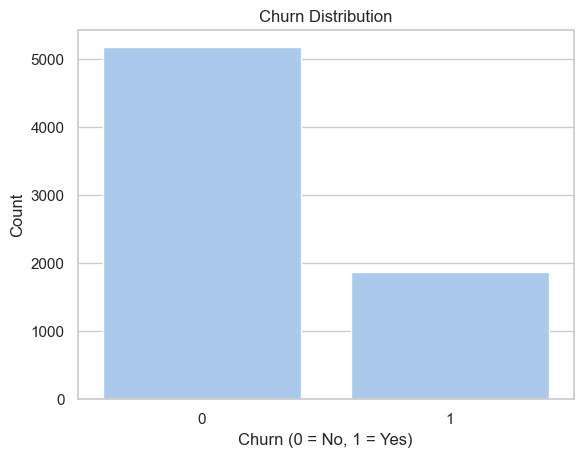

In [9]:
#Visualize churn count
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

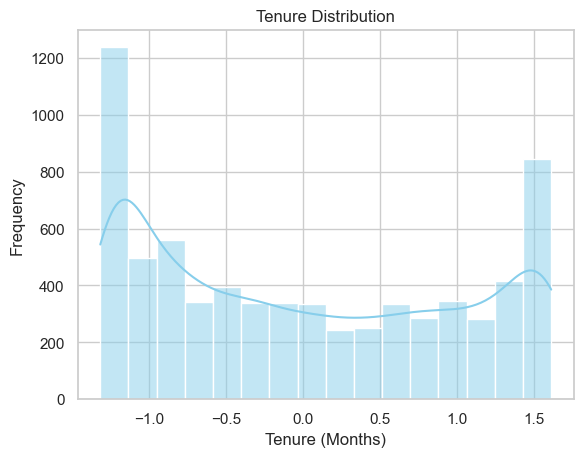

In [10]:
#Tenure distribution
sns.histplot(df['tenure'], kde=True, color='skyblue')
plt.title('Tenure Distribution')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()

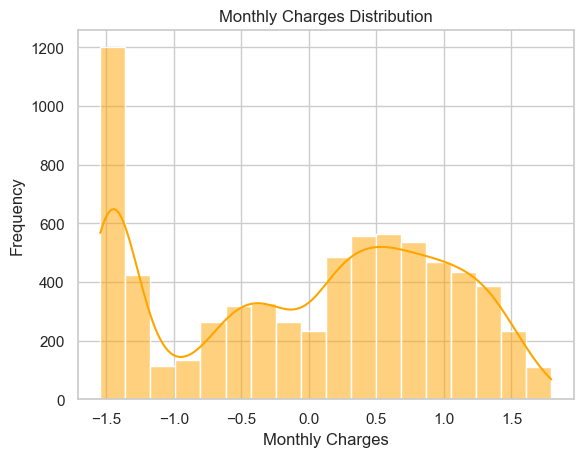

In [11]:
#Monthly Charges distribution
sns.histplot(df['MonthlyCharges'], kde=True, color='orange')
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

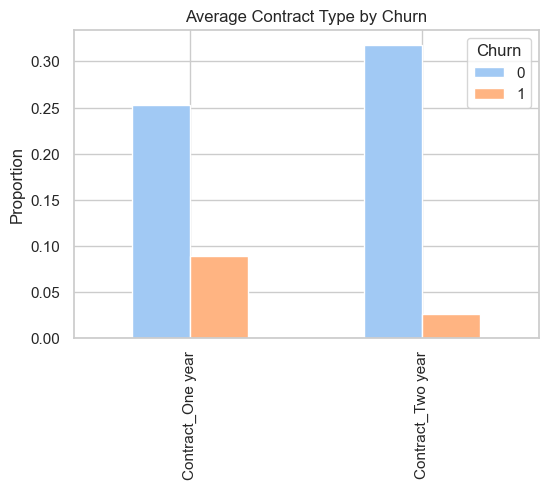

In [13]:
#Analyze churn across contract types
contract_cols = [col for col in df.columns if col.startswith('Contract_')]

if contract_cols:
    churn_means = df.groupby('Churn')[contract_cols].mean().T
    churn_means.plot(kind='bar', figsize=(6,4))
    plt.title('Average Contract Type by Churn')
    plt.ylabel('Proportion')
    plt.show()

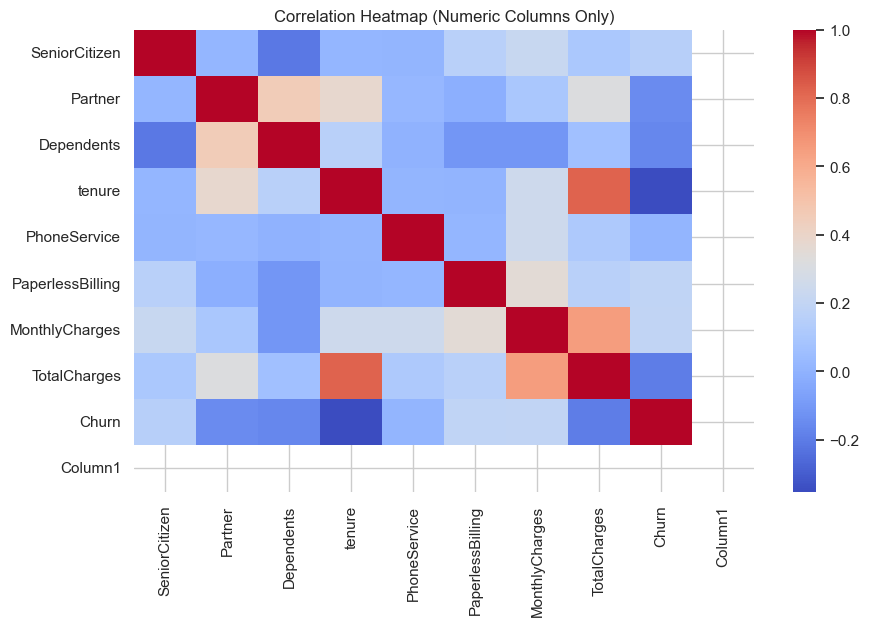

In [16]:
plt.figure(figsize=(10,6))
#only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()